# Data Setup and Explore

## Imports

In [1]:
from pathlib import Path
import shutil
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from src.paths import base_dir, data_dir, outputs_dir, figures_dir

✅ Directory ready: /Users/yassientawfik/Documents/Career/Projects/Elevvo Internship/DriveSafe-Sign-Detection/data
✅ Directory ready: /Users/yassientawfik/Documents/Career/Projects/Elevvo Internship/DriveSafe-Sign-Detection/outputs/figures


## Directories Verify

In [2]:
for path in [data_dir, figures_dir]:
    path.mkdir(parents=True, exist_ok=True)
    print(f"✅ Directory ready: {path}")

✅ Directory ready: /Users/yassientawfik/Documents/Career/Projects/Elevvo Internship/DriveSafe-Sign-Detection/data
✅ Directory ready: /Users/yassientawfik/Documents/Career/Projects/Elevvo Internship/DriveSafe-Sign-Detection/outputs/figures


## Download Datasets

In [3]:
expected_items = [
    data_dir / "Train",
    data_dir / "Test",
    data_dir / "Train.csv",
    data_dir / "Test.csv"
]

if all(p.exists() for p in expected_items):
    print("✅ Full dataset already exists. Skipping download.")
else:
    print("🔽 Downloading GTSRB dataset from KaggleHub...")
    dataset_path = Path(kagglehub.dataset_download("meowmeowmeowmeowmeow/gtsrb-german-traffic-sign"))

    if not dataset_path.exists():
        raise FileNotFoundError(f"❌ Dataset path not found: {dataset_path}")

    for item in dataset_path.iterdir():
        target = data_dir / item.name
        if item.is_file():
            shutil.copy2(item, target)
        elif item.is_dir():
            shutil.copytree(item, target, dirs_exist_ok=True)

    print(f"✅ Dataset copied to: {data_dir}")

✅ Full dataset already exists. Skipping download.


## Load CSV Files

In [4]:
train_df = pd.read_csv(data_dir / "Train.csv")
train_df.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


## Visualize Random Samples

🔍 Looking for: Train/13/00013_00058_00013.png


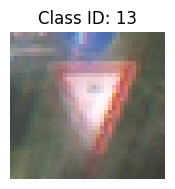

🔍 Looking for: Train/12/00012_00001_00025.png


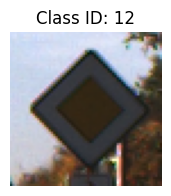

In [6]:
train_dir = data_dir / "Train"
sample = train_df.sample(2)

for _, row in sample.iterrows():
    relative_path = Path(row["Path"])
    if relative_path.parts[0] == "Train":
        relative_path = Path(*relative_path.parts[1:])
    img_path = train_dir / relative_path
    print(f"🔍 Looking for: {'/'.join(img_path.parts[-3:])}")

    if not img_path.exists():
        print(f"❌ File not found at: {'/'.join(img_path.parts[-3:])}")
        continue

    img = cv2.imread(str(img_path))
    if img is None:
        print(f"⚠️ OpenCV failed to read: {'/'.join(img_path.parts[-3:])}")
        continue

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(f"Class ID: {row['ClassId']}")
    plt.axis("off")
    plt.show()

## Class Distribution

✅ Plot saved to: /Users/yassientawfik/Documents/Career/Projects/Elevvo Internship/DriveSafe-Sign-Detection/outputs/figures/class_distribution.png


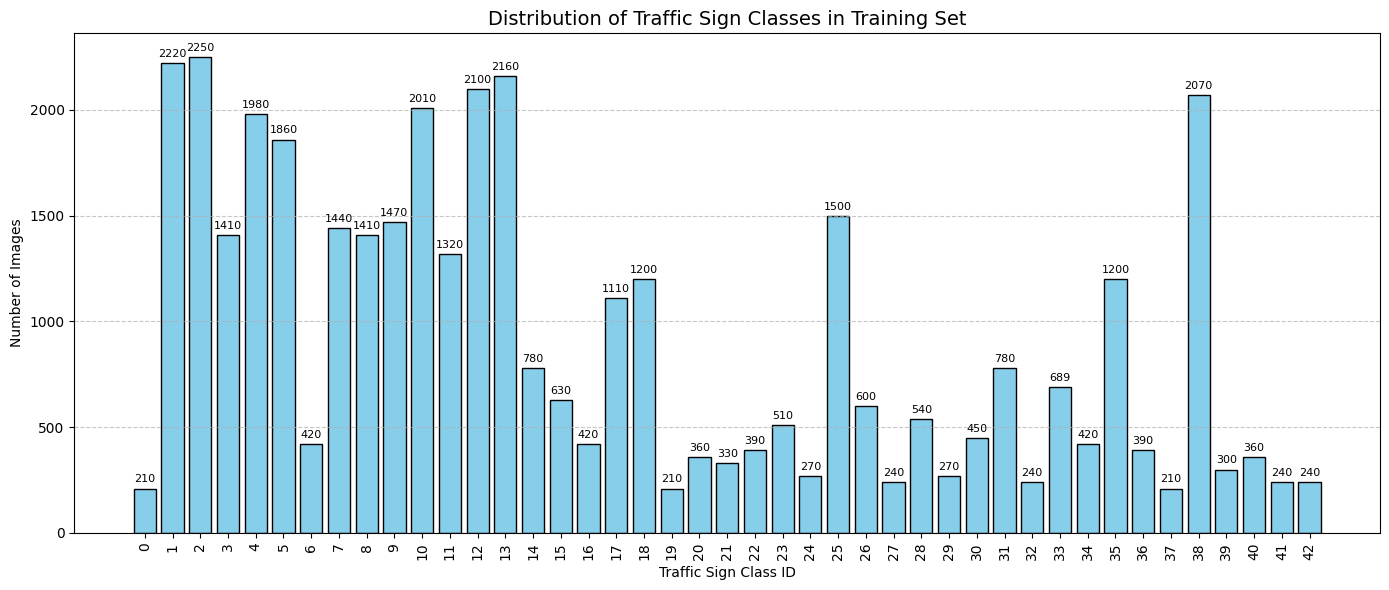

In [7]:
class_counts = train_df["ClassId"].value_counts().sort_index()

plt.figure(figsize=(14, 6))
bars = plt.bar(class_counts.index, class_counts.values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 20, str(height),
             ha='center', va='bottom', fontsize=8)

plt.xticks(class_counts.index, rotation=90)
plt.xlabel("Traffic Sign Class ID")
plt.ylabel("Number of Images")
plt.title("Distribution of Traffic Sign Classes in Training Set", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

save_path = figures_dir / "class_distribution.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✅ Plot saved to: {save_path}")
plt.show()